# Análise sobre categorias de produtos que tiveram avaliações negativas

## Análisando dados e identificando categorias que tiveram maior quantidade de avaliações negativas

### Com base na análise realizada, foi possível encontrar uma categoria que possui uma grande quantidade de avaliações negativas, que neste caso é a categoria **cama_mesa_banho**, porém em outra análise realizada, identificou-se que esta categoria também está no Top 10 de categoria com maior valor de vendas de produtos, para ser mais exato, essa categoria está em terceiro lugar no Top 10 de categorias que possuem maior valor de vendas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from datetime import datetime

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Carregando bases de dados

In [3]:
df_customers = pd.read_csv('../datasets/olist_customers_dataset.csv', encoding='ISO-8859-1')
df_geolocation = pd.read_csv('../datasets/olist_geolocation_dataset.csv', encoding='ISO-8859-1')
df_order_items = pd.read_csv('../datasets/olist_order_items_dataset.csv', encoding='ISO-8859-1')
df_order_payments = pd.read_csv('../datasets/olist_order_payments_dataset.csv', encoding='ISO-8859-1')
df_order_reviews = pd.read_csv('../datasets/olist_order_reviews_dataset.csv', encoding='ISO-8859-1')
df_orders = pd.read_csv('../datasets/olist_orders_dataset.csv', encoding='ISO-8859-1')
df_products = pd.read_csv('../datasets/olist_products_dataset.csv', encoding='ISO-8859-1')
df_sellers = pd.read_csv('../datasets/olist_sellers_dataset.csv', encoding='ISO-8859-1')
df_product_category_name_translation = pd.read_csv('../datasets/product_category_name_translation.csv', encoding='ISO-8859-1')

## Base de Clientes

In [4]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Base de Lojistas

In [5]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Base de Geolocalizações

In [6]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Base de Pedidos

In [7]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Itens do pedido

In [8]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Forma de pagamento de cada pedido

In [9]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Retorno de clientes sobre a compra realizada

In [10]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,ParabÃ©ns lojas lannister adorei comprar pela ...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Dados cadastrais de cada produto

In [11]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## Tradução das categorias de produtos

In [12]:
df_product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Fazendo um merge entre os dataframes para iniciarmos a análise

In [26]:
df_mg_reviews_orders_items = df_order_reviews.merge(df_order_items, on='order_id')
df_mg_reviews_orders_items = df_mg_reviews_orders_items.merge(df_products, on='product_id')
df_mg_reviews_orders_items = df_mg_reviews_orders_items[df_mg_reviews_orders_items['review_score'] == 1]

## Exibindo algumas linhas do dataframe resultante do merge realizado anteriormente

In [27]:
df_mg_reviews_orders_items.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5,3048ab17e39285ed6f995b5dcd0e74db,1a6b9a764637acbc39e1624a2211f548,1,Muito Ruim,"Comprei 6 cartuchos, recebi apenas 4 unidades ...",2018-08-24 00:00:00,2018-08-27 12:17:01,1,be0dbdc3d67d55727a65d4cd696ca73c,e9bc59e7b60fc3063eb2290deda4cced,...,65.0,13.8,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
6,3048ab17e39285ed6f995b5dcd0e74db,1a6b9a764637acbc39e1624a2211f548,1,Muito Ruim,"Comprei 6 cartuchos, recebi apenas 4 unidades ...",2018-08-24 00:00:00,2018-08-27 12:17:01,2,be0dbdc3d67d55727a65d4cd696ca73c,e9bc59e7b60fc3063eb2290deda4cced,...,65.0,13.8,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
7,3048ab17e39285ed6f995b5dcd0e74db,1a6b9a764637acbc39e1624a2211f548,1,Muito Ruim,"Comprei 6 cartuchos, recebi apenas 4 unidades ...",2018-08-24 00:00:00,2018-08-27 12:17:01,3,be0dbdc3d67d55727a65d4cd696ca73c,e9bc59e7b60fc3063eb2290deda4cced,...,65.0,13.8,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
8,3048ab17e39285ed6f995b5dcd0e74db,1a6b9a764637acbc39e1624a2211f548,1,Muito Ruim,"Comprei 6 cartuchos, recebi apenas 4 unidades ...",2018-08-24 00:00:00,2018-08-27 12:17:01,4,be0dbdc3d67d55727a65d4cd696ca73c,e9bc59e7b60fc3063eb2290deda4cced,...,65.0,13.8,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
9,3048ab17e39285ed6f995b5dcd0e74db,1a6b9a764637acbc39e1624a2211f548,1,Muito Ruim,"Comprei 6 cartuchos, recebi apenas 4 unidades ...",2018-08-24 00:00:00,2018-08-27 12:17:01,5,be0dbdc3d67d55727a65d4cd696ca73c,e9bc59e7b60fc3063eb2290deda4cced,...,65.0,13.8,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0


## Fazendo um groupby através da coluna "product_category_name" no dataframe **df_mg_reviews_orders_items**

In [28]:
gp = df_mg_reviews_orders_items.groupby(by='product_category_name')['review_score'].count().to_frame()
gp.reset_index(inplace=True)

In [29]:
gp

,product_category_name,review_score
0,agro_industria_e_comercio,27
1,alimentos,61
2,alimentos_bebidas,18
3,artes,32
4,artes_e_artesanato,3
5,artigos_de_festas,8
6,artigos_de_natal,25
7,audio,61
8,automotivo,530
9,bebes,419


## Plotando um gráfico para visualizarmos a quantidade de avaliações negativas em cada categoria de produtos

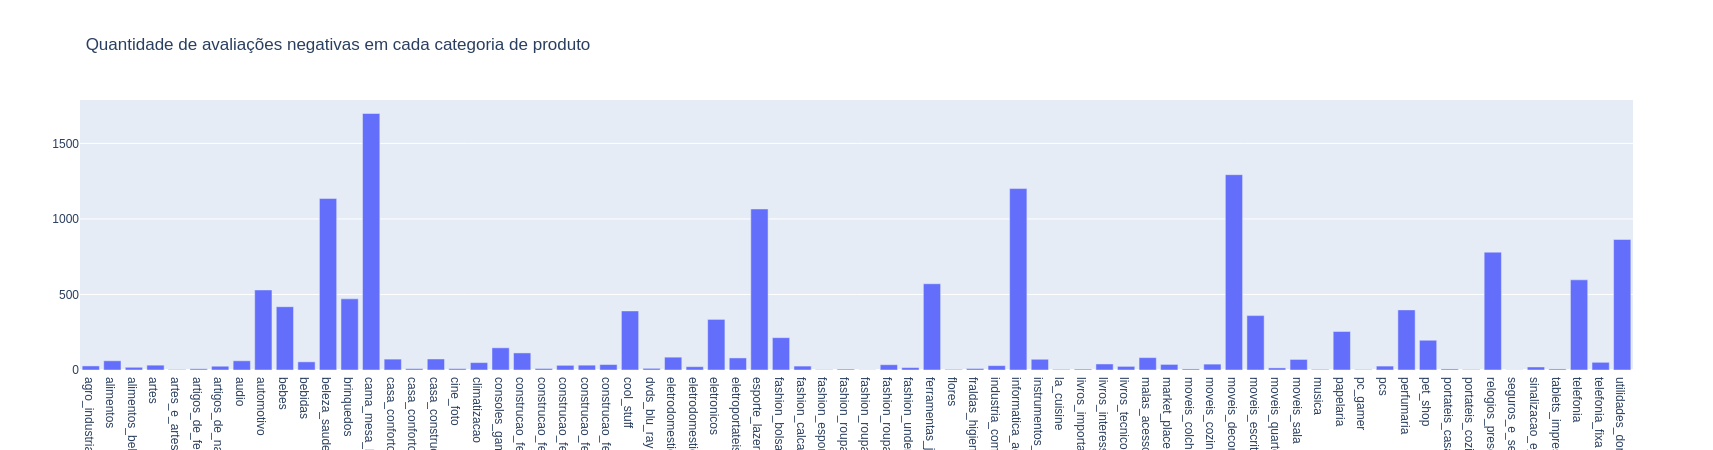

In [30]:
review_score_category_name = [go.Bar(x=gp['product_category_name'], y=gp['review_score'])]

layout = go.Layout(title='Quantidade de avaliações negativas em cada categoria de produto')

fig = go.Figure(data=review_score_category_name, layout=layout)

py.iplot(fig)

## Plotando o TOP 10 de categorias que possuem maior quantidade de avaliações negativas

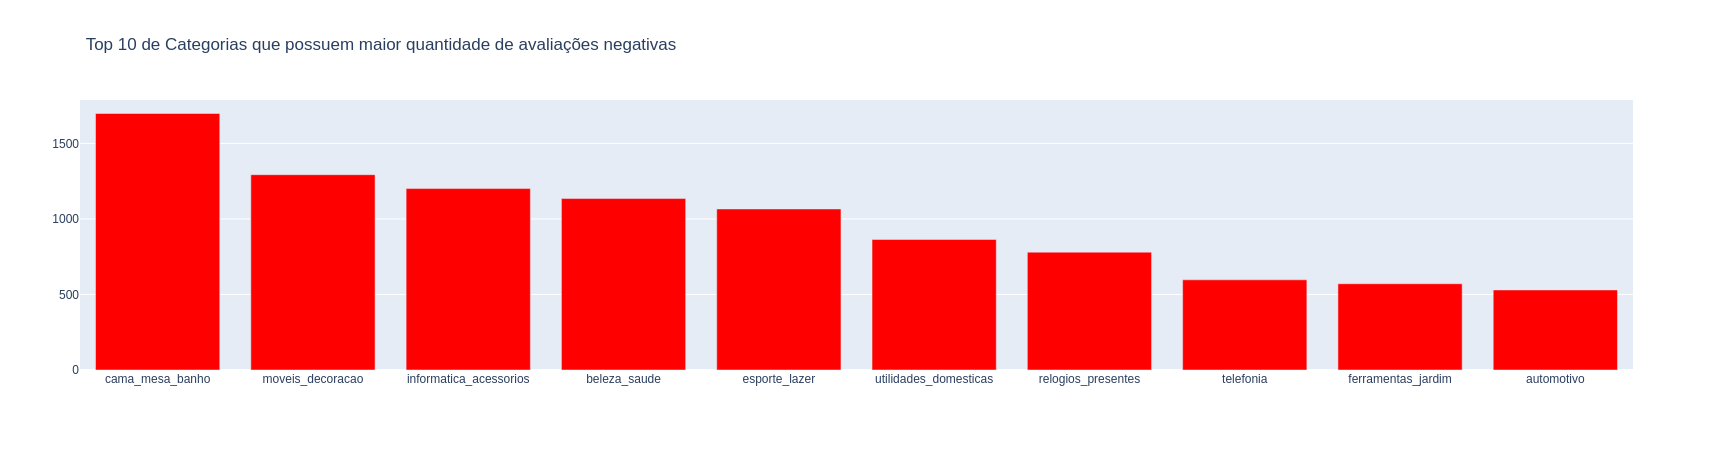

In [23]:
gp.sort_values('review_score',ascending=False, inplace=True)

mean_price_orders_category_name = [go.Bar(x=gp['product_category_name'].head(10), y=gp['review_score'].head(10), marker={'color':'#FF0000'})]

layout = go.Layout(title='Top 10 de Categorias que possuem maior quantidade de avaliações negativas')

fig = go.Figure(data=mean_price_orders_category_name, layout=layout)

py.iplot(fig)

## Plotando o TOP 10 de categorias que possuem menor quantidade de avaliações negativas

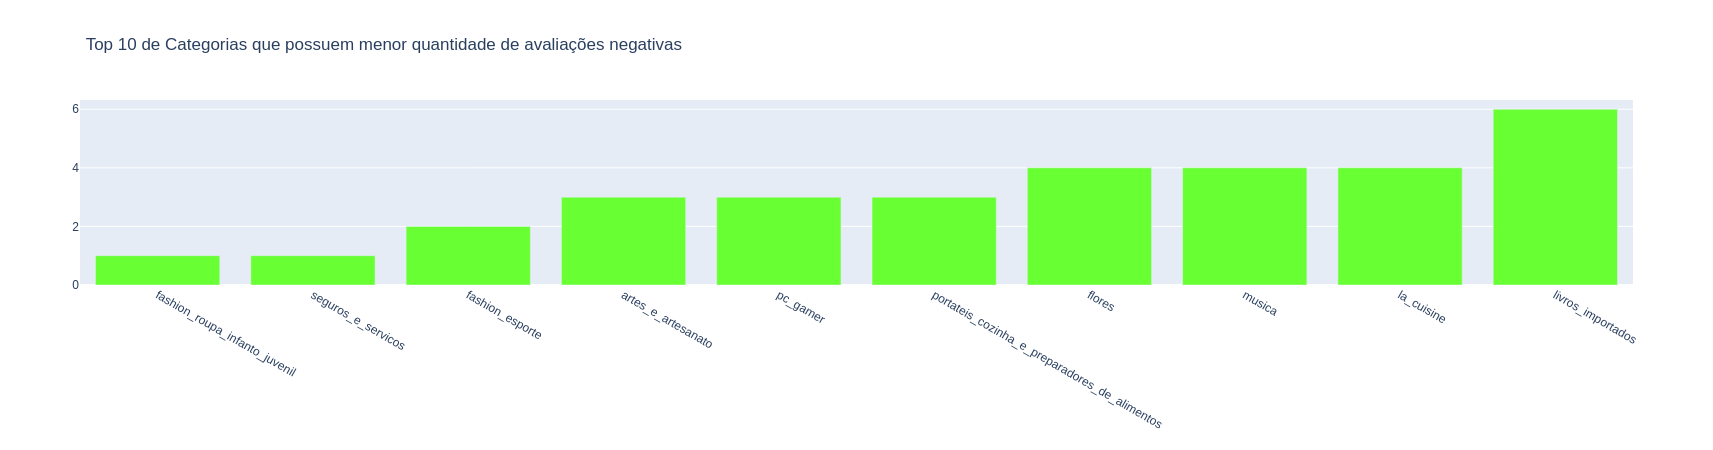

In [24]:
gp.sort_values('review_score',ascending=True, inplace=True)

mean_price_orders_category_name = [go.Bar(x=gp['product_category_name'].head(10), y=gp['review_score'].head(10), marker={'color':'#68FF33'})]

layout = go.Layout(title='Top 10 de Categorias que possuem menor quantidade de avaliações negativas')

fig = go.Figure(data=mean_price_orders_category_name, layout=layout)

py.iplot(fig)